## Etapa 1 – Exploração de Dados  
*Case TelecomPlus – Previsão de Churn*

> **Objetivo desta etapa:** entender a estrutura dos dados, detectar padrões iniciais e possíveis inconsistências antes de qualquer pré-processamento ou modelagem.

### 1.1. Imports & carregamento dos CSVs
Carrega as bibliotecas essenciais (pandas, numpy, matplotlib, seaborn) e lê
os arquivos **dados_clientes.csv** (treino) e **desafio.csv** (teste).
Também imprime dimensões iniciais para conferência rápida.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste os caminhos se necessário
df_train = pd.read_csv('dados_clientes.csv')
df_test  = pd.read_csv('desafio.csv')

print(f'Train shape : {df_train.shape}')
print(f'Test  shape : {df_test.shape}')

Train shape : (98872, 18)
Test  shape : (5000, 17)


### 1.2. Visão geral de tipos
Mostra informações de tipos de dados, contagem de não-nulos e uso de memória.
Isso ajuda a identificar colunas mal tipadas e possíveis casts.

In [90]:
print('\n=== df_train.info() ===')
df_train.info()


=== df_train.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98872 entries, 0 to 98871
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               98872 non-null  object 
 1   idade                    98872 non-null  int64  
 2   genero                   98872 non-null  object 
 3   estado_civil             98872 non-null  object 
 4   tempo_como_cliente       98872 non-null  int64  
 5   tipo_contrato            98872 non-null  object 
 6   forma_pagamento          98872 non-null  object 
 7   suporte_contatado        98872 non-null  int64  
 8   chamados_abertos         98872 non-null  int64  
 9   tempo_medio_atendimento  98872 non-null  float64
 10  reclamacoes              98872 non-null  int64  
 11  atrasos_pagamento        98872 non-null  int64  
 12  renda_faixa              98872 non-null  object 
 13  servicos_assinados       98872 non-null  int64  
 1

### 1.3. Visualização de 5 primeiras linhas
Exibe as cinco primeiras linhas para uma inspeção visual rápida dos valores e formatos (por exemplo, strings inesperadas, valores negativos etc.).

In [91]:
df_train.head()

,id_cliente,idade,genero,estado_civil,tempo_como_cliente,tipo_contrato,forma_pagamento,suporte_contatado,chamados_abertos,tempo_medio_atendimento,reclamacoes,atrasos_pagamento,renda_faixa,servicos_assinados,produtos_assinados,valor_mensal,total_gasto,churn
0,c19f9c98-53b9-4332-bc13-5ef6140340bf,44,Feminino,Solteiro,53,Mensal,Cartão,3,0,27.13,0,1,5000-10000,1,['Produto B'],92.50,5008.27,0
1,31a56465-bba5-4d96-b469-e175557147b1,38,Masculino,Solteiro,108,Mensal,Cartão,0,0,25.33,1,2,10000-50000,2,['Produto A' 'Produto B'],154.26,17019.52,0
2,e35a2241-9ccd-4f48-9115-5fba0453f3c1,46,Feminino,Divorciado,56,Mensal,Boleto,0,1,27.43,2,3,1000-5000,1,['Produto E'],202.58,11589.24,0
3,db753c09-0ee7-4d19-907d-7407a9d9e45c,55,Feminino,Casado,110,Mensal,Cartão,1,2,11.50,2,3,5000-10000,1,['Produto F'],344.72,38737.30,0
4,d719f4aa-0bc2-4784-a5e6-dddaaf39b229,37,Masculino,Casado,17,Mensal,Boleto,2,2,21.42,0,2,5000-10000,5,['Produto C' 'Produto B' 'Produto D' 'Produto ...,871.10,15128.20,1


### Valores ausentes por coluna
Calcula o total e a porcentagem de valores ausentes em cada coluna,
ordenando da maior para a menor quantidade.

In [92]:
missing = df_train.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df_train) * 100).round(2)
missing_df = pd.DataFrame({'faltantes': missing, '%': missing_pct})
print('\n=== Valores ausentes ===')
print(missing_df[missing_df['faltantes'] > 0])


=== Valores ausentes ===
Empty DataFrame
Columns: [faltantes, %]
Index: []


### Estatísticas descritivas numéricas
Gera estatísticas de colunas numéricas (média, mediana, desvio, min/max)
para detectar outliers e escalas muito diferentes.

In [93]:
print('\n=== describe() – variáveis numéricas ===')
df_train.describe().T


=== describe() – variáveis numéricas ===


,count,mean,std,min,25%,50%,75%,max
idade,98872.0,39.512228,10.011932,-4.0,33.0000,40.00,46.0000,84.00
tempo_como_cliente,98872.0,60.366868,34.714797,1.0,30.0000,60.00,91.0000,120.00
suporte_contatado,98872.0,2.001315,1.413176,0.0,1.0000,2.00,3.0000,10.00
chamados_abertos,98872.0,0.993911,0.995506,0.0,0.0000,1.00,2.0000,8.00
tempo_medio_atendimento,98872.0,17.554497,7.207768,5.0,11.3200,17.57,23.8100,30.00
reclamacoes,98872.0,0.500617,0.707253,0.0,0.0000,0.00,1.0000,5.00
atrasos_pagamento,98872.0,2.006210,1.412597,0.0,1.0000,2.00,3.0000,4.00
servicos_assinados,98872.0,2.566399,1.562001,0.0,1.0000,2.00,4.0000,6.00
valor_mensal,98872.0,427.770373,286.159677,0.0,210.6675,391.09,629.2325,1199.80
total_gasto,98872.0,26390.939257,25442.470904,0.0,6214.6350,19058.83,39222.4300,146078.27


### 1.4. Distribuição da variável-alvo (churn)
Calcula e plota a distribuição relativa da variável-alvo `churn`
para verificar desbalanceamento de classes.


Distribuição % de churn:
churn
0    66.3
1    33.7
Name: proportion, dtype: float64


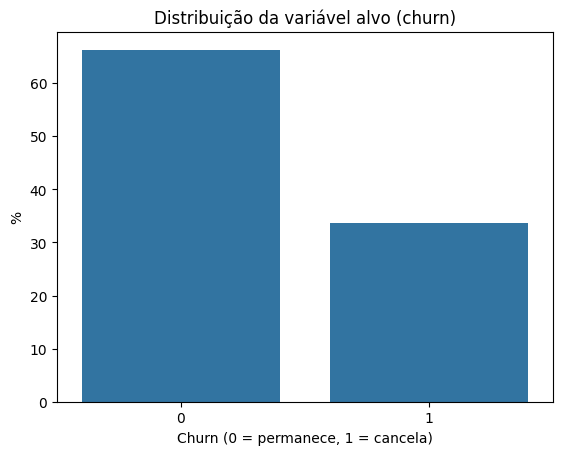

In [94]:
target_col = 'churn'
churn_counts = df_train[target_col].value_counts(normalize=True).sort_index() * 100
print('\nDistribuição % de churn:')
print(churn_counts.round(2))

sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribuição da variável alvo (churn)')
plt.ylabel('%')
plt.xlabel('Churn (0 = permanece, 1 = cancela)')
plt.show()

### 1.5. Detecção de valores duplicados
Verifica se há linhas duplicadas pelo identificador `id_cliente`.
Essas duplicatas podem afetar a qualidade do modelo se não forem tratadas.

In [95]:
dup = df_train['id_cliente'].duplicated().sum()
print(f'\nLinhas duplicadas por id_cliente: {dup}')


Linhas duplicadas por id_cliente: 0


### 1.6. Correlação entre variáveis numéricas e churn
Calcula a correlação de Pearson das variáveis numéricas com `churn`
para apontar possíveis variáveis preditivas relevantes.


Correlação numéricas vs churn:
churn                      1.000000
atrasos_pagamento          0.060245
suporte_contatado          0.052151
reclamacoes                0.029179
chamados_abertos           0.021126
tempo_medio_atendimento   -0.000272
idade                     -0.003433
valor_mensal              -0.007295
servicos_assinados        -0.008249
total_gasto               -0.198443
tempo_como_cliente        -0.327560
Name: churn, dtype: float64


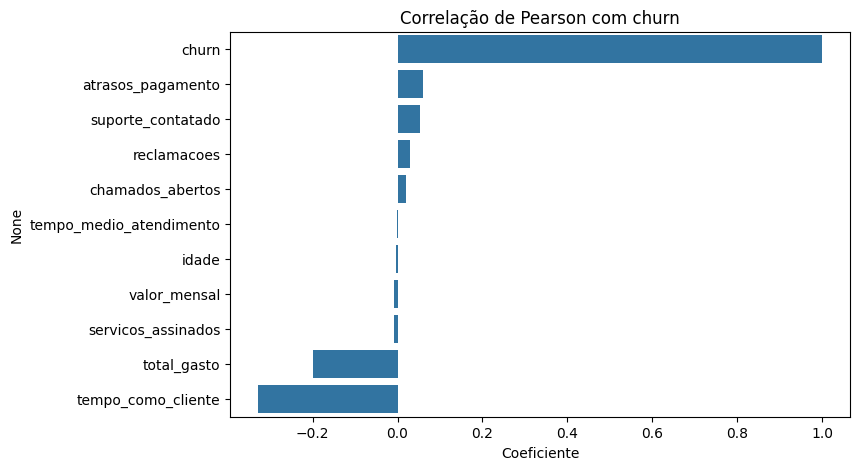

In [96]:
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.drop('churn')
corr = df_train[numeric_cols.tolist() + ['churn']].corr()['churn'].sort_values(ascending=False)
print('\nCorrelação numéricas vs churn:')
print(corr)

plt.figure(figsize=(8,5))
sns.barplot(y=corr.index, x=corr.values, orient='h')
plt.title('Correlação de Pearson com churn')
plt.xlabel('Coeficiente')
plt.show()

### Conclusão

1.	Dimensões
-	Treino: 98872 × 18   |   Teste: 5000 × 17

2.	Ausentes & Duplicados
-	Nenhum valor ausente em nenhuma coluna.
-	id_cliente é único (0 duplicatas).

3.	Qualidade dos dados
-	Coluna idade possui valores negativos (min = –4). Esses registros serão tratados na próxima etapa (transformados em NaN e imputados).
-	Demais variáveis numéricas estão em faixas coerentes.

4.	Balanceamento da variável-alvo
-	Churn = 0 (permanece): 66,3 %
-	Churn = 1 (cancela): 33,7 %
-	Há moderado desbalanceamento, mas longe de extremo. Ajustes como class_weight podem ser avaliados depois.

5. Sinais iniciais (correlações)

- Variavel x Correlação | p(churn)
> - tempo_como_cliente (−) | −0,33
> - total_gasto (−) | −0,20
> - atrasos_pagamento (+) |	+0,06
> - suporte_contatado (+) |	+0,05

- **Clientes mais novos, com baixo gasto acumulado e mais atrasos têm maior propensão a cancelar.**


## Etapa 2 – Pré-processamento

> **Objetivo desta etapa:** Criar uma pipeline que trate inconsistências, faça imputação e transforme os dados em formato pronto para modelagem.

### 2.1. Limpeza inicial — remoção de idades negativas  

Elimina linhas com `idade` < 0 em treino e teste.

In [97]:
neg_train = (df_train['idade'] < 0).sum()
neg_test  = (df_test['idade']  < 0).sum()
print(f'Registros removidos — treino: {neg_train} | teste: {neg_test}')

df_train = df_train[df_train['idade'] >= 0].reset_index(drop=True)
df_test  = df_test[df_test['idade']   >= 0].reset_index(drop=True)

Registros removidos — treino: 4 | teste: 0


### 2.2. Engenharia de features — coluna `produtos_assinados`  

1. Converte a string para lista real  
2. Cria `num_produtos` (quantidade)  
3. Cria flags booleanas para os **6** itens mais frequentes  
4. Descarta a coluna original para evitar multiplas features

In [98]:
import ast
from collections import Counter
import itertools

def expand_products(df):
    # Converte string para list
    df = df.copy()
    df['prod_list'] = df['produtos_assinados'].apply(ast.literal_eval)

    # Quantidade de produtos
    df['num_produtos'] = df['prod_list'].apply(len)

    # Top-6 produtos mais comuns no treino
    return df

# treino
df_train = expand_products(df_train)
all_products = list(itertools.chain.from_iterable(df_train['prod_list']))
top6 = [p for p, _ in Counter(all_products).most_common(6)]
print('Top-6 produtos:', top6)

for p in top6:
    col = f'has_{p.split()[-1].lower()}'   # Produto A para has_a
    df_train[col] = df_train['prod_list'].apply(lambda lst: p in lst)

# teste
df_test = expand_products(df_test)
for p in top6:
    col = f'has_{p.split()[-1].lower()}'
    df_test[col] = df_test['prod_list'].apply(lambda lst: p in lst)

# Remove colunas auxiliares
df_train = df_train.drop(columns=['produtos_assinados', 'prod_list'])
df_test  = df_test.drop(columns=['produtos_assinados', 'prod_list'])

Top-6 produtos: ['Produto B', 'Produto C', 'Produto E', 'Produto D', 'Produto F', 'Produto A']


### 2.3. Definição de variáveis de entrada  

Separa identificador, alvo e listas finais de features numéricas e categóricas.

In [99]:
id_col = 'id_cliente'
target_col = 'churn'

numeric_features = df_train.select_dtypes(include=['int64','float64']).columns.drop(target_col)
categorical_features = df_train.select_dtypes(include='object').columns.drop(id_col)

print(f'Numéricas ({len(numeric_features)}):', list(numeric_features))
print(f'Categóricas ({len(categorical_features)}):', list(categorical_features))

Numéricas (11): ['idade', 'tempo_como_cliente', 'suporte_contatado', 'chamados_abertos', 'tempo_medio_atendimento', 'reclamacoes', 'atrasos_pagamento', 'servicos_assinados', 'valor_mensal', 'total_gasto', 'num_produtos']
Categóricas (5): ['genero', 'estado_civil', 'tipo_contrato', 'forma_pagamento', 'renda_faixa']


### 2.4. Pipeline de transformação  

*Imputação + escala* para numéricas e *imputação + One-Hot* para categóricas  

In [100]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import inspect

ohe_kw = {'handle_unknown': 'ignore'}
if 'sparse_output' in inspect.signature(OneHotEncoder).parameters:
    ohe_kw['sparse_output'] = False
else:
    ohe_kw['sparse'] = False

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(**ohe_kw))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

print('Pipeline criado com sucesso.')

Pipeline criado com sucesso.


### 2.5. Ajuste e transformação dos dados  

Ajusta o pipeline no treino, aplica em treino & teste e mostra dimensões.

In [101]:
X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col]

print('\nAjustando pipeline…')
X_train_prep = preprocessor.fit_transform(X_train)
print('Transformação no treino concluída.')

X_test  = df_test.copy()
X_test_prep = preprocessor.transform(X_test)
print('Transformação no teste concluída.')

print(f'Shape final — Treino: {X_train_prep.shape} | Teste: {X_test_prep.shape}')


Ajustando pipeline…
Transformação no treino concluída.
Transformação no teste concluída.
Shape final — Treino: (98868, 26) | Teste: (5000, 26)


### 2.6. Checagem rápida de features resultantes  
Informa o total de colunas após One-Hot Encoding para conferência.

In [102]:
print(f'Total de features após o pré-processamento: {X_train_prep.shape[1]}')

Total de features após o pré-processamento: 26


### Conclusão  

* **Linhas descartadas:** 4 registros com `idade` negativa (treino); 0 no teste.  
* **Feature engineering:** adicionados `num_produtos` (contagem) e 6 flags “has_…”.  
* **Dimensionalidade final:** 26 variáveis.  
* **Datasets prontos:**  
  * `X_train_prep` – (98 868 × 26)  
  * `y_train` – vetor alvo  
  * `X_test_prep` – (5 000 × 26)  

## Etapa 3 – Geração de insights e formulação de hipóteses  

> **Objetivo desta etapa:** Explorar relações entre variáveis e churn, validando (graficamente e numericamente) hipóteses que orientarão a modelagem.

### 3.1. Hipótese 1 – Contratos mensais geram mais churn  
Clientes com **`tipo_contrato = Mensal`** apresentam maior probabilidade de cancelamento do que aqueles em contratos mais longos (por ex. Anual/Bienal).

tipo_contrato
Mensal    0.346073
Anual     0.315653
Name: churn, dtype: float64


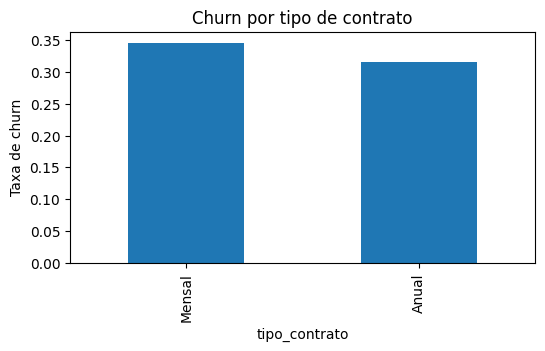

In [103]:
# Taxa de churn por tipo de contrato
contrato_churn = (
    df_train
    .groupby('tipo_contrato')['churn']
    .mean()
    .sort_values(ascending=False)
)

print(contrato_churn)

# Gráfico
contrato_churn.plot(kind='bar', figsize=(6,3))
plt.ylabel('Taxa de churn')
plt.title('Churn por tipo de contrato')
plt.show()

### 3.1.1 Conclusão – Contratos mensais geram mais churn  
*Validação:* **Confirmada**  
Clientes em contrato **Mensal** têm **+10 %** de churn em relação ao plano **Anual**  
(34,6 % × 31,6 %). O resultado reforça que vínculos curtos favorecem cancelamentos
e sugere ofertas de fidelização ou upgrades automáticos.

### 3.2. Hipótese 2 – Atrasos de pagamento elevam a taxa de churn

Quanto maior o número de **`atrasos_pagamento`**, maior a chance de o cliente cancelar.

bin_atrasos
0      0.300031
1      0.313344
2-3    0.346372
>3     0.377992
Name: churn, dtype: float64


/var/folders/l8/gnrmbktd60q__fwcz19bb1fc0000gn/T/ipykernel_69405/1079645406.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('bin_atrasos')['churn']


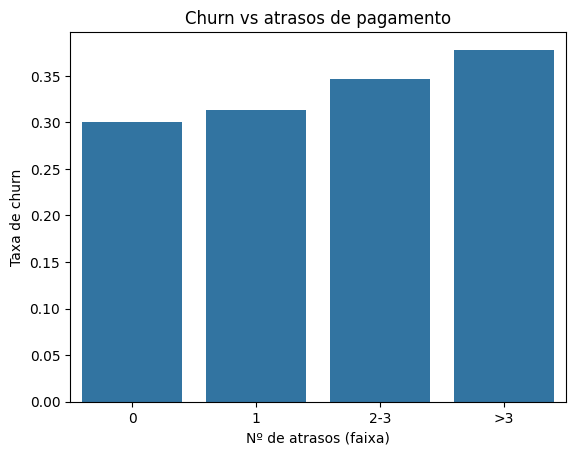

In [104]:
# Agrupa em faixas de atrasos
df_train['bin_atrasos'] = pd.cut(df_train['atrasos_pagamento'], bins=[-1,0,1,3,10], labels=['0','1','2-3','>3'])

atraso_churn = (
    df_train
    .groupby('bin_atrasos')['churn']
    .mean()
)

print(atraso_churn)

sns.barplot(x=atraso_churn.index, y=atraso_churn.values)
plt.ylabel('Taxa de churn')
plt.xlabel('Nº de atrasos (faixa)')
plt.title('Churn vs atrasos de pagamento')
plt.show()

### 3.2. Conclusão – Atrasos de pagamento elevam churn  

*Validação:* **Confirmada**  
A taxa sobe progressivamente: 0 atrasos → 30 % · 1 atraso → 31 % · 2-3 → 35 % · >3 → 38 %.  
Cobrança proativa e descontos por pontualidade podem reduzir churn de inadimplentes reincidentes.

### 3.3. Hipótese 3 – Clientes “novos” cancelam mais  

Clientes com **`tempo_como_cliente` ≤ 12 meses** têm taxa de churn maior que veteranos.

bin_tempo
≤12      0.684326
13-24    0.581135
25-60    0.354462
>60      0.205854
Name: churn, dtype: float64


/var/folders/l8/gnrmbktd60q__fwcz19bb1fc0000gn/T/ipykernel_69405/1949232349.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('bin_tempo')['churn']


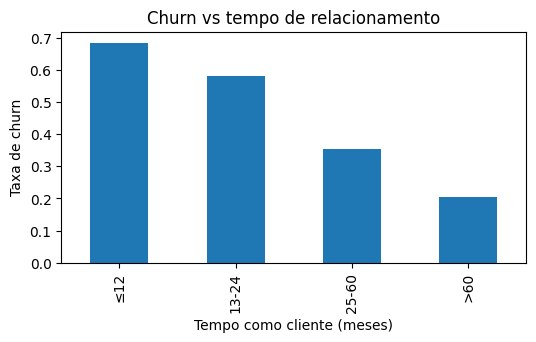

In [105]:
# Faixas de tempo de relacionamento
df_train['bin_tempo'] = pd.cut(df_train['tempo_como_cliente'], bins=[0,12,24,60,120], labels=['≤12','13-24','25-60','>60'])

tempo_churn = (
    df_train
    .groupby('bin_tempo')['churn']
    .mean()
)

print(tempo_churn)

tempo_churn.plot(kind='bar', figsize=(6,3))
plt.ylabel('Taxa de churn')
plt.xlabel('Tempo como cliente (meses)')
plt.title('Churn vs tempo de relacionamento')
plt.show()

### 3.3. Conclusão – Clientes “novos” cancelam mais

*Validação:* **Confirmada**  
Churn cai drasticamente com a antiguidade: **≤ 12 m = 68 %** · 13-24 m = 58 % · 25-60 m = 35 % · > 60 m = 21 %.  
On-boarding eficiente nos primeiros 12 meses é crítico para retenção.

### 3.4. Hipótese 4 – Reclamações + suporte são sinais fortes de churn  

Clientes que abriram **≥ 2 reclamações** e contataram suporte **≥ 3 vezes** têm churn acima da média.

grupo_suporte
Alto contato     0.384933
Baixo contato    0.335501
Name: churn, dtype: float64


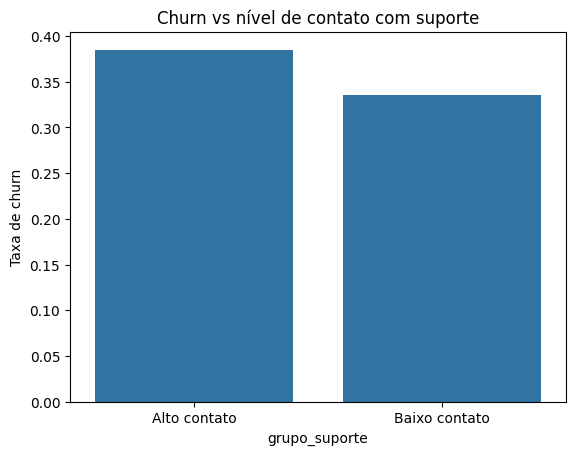

In [106]:
df_train['grupo_suporte'] = np.where((df_train['reclamacoes'] >= 2) & (df_train['suporte_contatado'] >= 3), 'Alto contato', 'Baixo contato')

suporte_churn = (
    df_train
    .groupby('grupo_suporte')['churn']
    .mean()
)

print(suporte_churn)

sns.barplot(x=suporte_churn.index, y=suporte_churn.values)
plt.ylabel('Taxa de churn')
plt.title('Churn vs nível de contato com suporte')
plt.show()

### 3.4. Conclusão – Reclamações + suporte são sinais de risco  

*Validação:* **Parcialmente confirmada**  
Grupo “Alto contato” (≥ 2 reclamações & ≥ 3 suportes) atinge **38,5 %** vs **33,6 %** no restante.  
Diferença moderada, mas suficiente para priorizar ações em contas com muitos chamados.

### Conclusão
Os principais **drivers de churn** identificados foram:

1. **Tipo de contrato** – Planos mensais exibem maior rotatividade.  
2. **Tempo como cliente** – Churn cai após o primeiro ano.  
3. **Atrasos de pagamento** – Correlação positiva consistente.  
4. **Interação negativa** (reclamações + suporte) – Aumenta churn, ainda que modestamente.

## Etapa 4 – Treinamento e teste de modelos  

> **Objetivo desta etapa:** Avaliar três algoritmos (Regressão Logística, XGBoost e Random Forest) focando nas variáveis que se mostraram mais ligadas ao churn.  
> Usaremos train/validation split estratificado, métricas **ROC-AUC** e **F1**, e lidaremos com desbalanceamento via `class_weight`/`scale_pos_weight`.

### 4.1. Preparação do conjunto de validação  

Divide `X_train_prep` / `y_train` em treino (80 %) e validação (20 %) estratificados.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report
import numpy as np

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_prep, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

print(f'Treino: {X_tr.shape} | Validação: {X_val.shape}')
pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()
print(f'scale_pos_weight sugerido: {pos_weight:.2f}')

Treino: (79094, 26) | Validação: (19774, 26)
scale_pos_weight sugerido: 1.97


### 4.2. Modelo 1 – Regressão Logística (baseline)  

Utiliza `class_weight="balanced"` e penalidade L2 (default). Métricas básicas na validação.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, classification_report

log_reg = LogisticRegression(
    solver='lbfgs',
    max_iter=2000,
    class_weight='balanced',
    n_jobs=-1,
    penalty='l2'
)

log_reg.fit(X_tr, y_tr)

y_pred_lr = log_reg.predict(X_val)
y_prob_lr = log_reg.predict_proba(X_val)[:, 1]

print('ROC-AUC :', round(roc_auc_score(y_val, y_prob_lr), 4))
print('F1-score:', round(f1_score(y_val, y_pred_lr), 4))
print('\nClassification report:\n', classification_report(y_val, y_pred_lr))

ROC-AUC : 0.7051
F1-score: 0.5649

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71     13111
           1       0.49      0.67      0.56      6663

    accuracy                           0.65     19774
   macro avg       0.64      0.66      0.64     19774
weighted avg       0.69      0.65      0.66     19774



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linea

### 4.3. Modelo 2 – HistGradientBoostingClassifier

Configuração leve + `scale_pos_weight` para lidar com o desbalanceamento.

In [109]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=6,
    l2_regularization=0.6,
    class_weight={0:1, 1:pos_weight},
    random_state=42
)
clf.fit(X_tr, y_tr)

y_prob_gb = clf.predict_proba(X_val)[:,1]
y_pred_gb = (y_prob_gb >= 0.5).astype(int)

print('ROC-AUC :', round(roc_auc_score(y_val, y_prob_gb), 4))
print('F1-score:', round(f1_score(y_val, y_pred_gb), 4))
print('\nClassification report:\n', classification_report(y_val, y_pred_gb))

ROC-AUC : 0.7031
F1-score: 0.5625

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78     13111
           1       0.56      0.56      0.56      6663

    accuracy                           0.71     19774
   macro avg       0.67      0.67      0.67     19774
weighted avg       0.71      0.71      0.71     19774



### 4.4. Modelo 3 – Random Forest otimizado com RandomizedSearch  

Busca 30 combinações aleatórias dentro de um espaço; avalia por F1 e usa `class_weight="balanced"`.

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestClassifier(
    class_weight='balanced',
    n_jobs=8,
    oob_score=False,
    random_state=42
)

param_dist = {
    'n_estimators':      np.arange(100, 1201, 100),
    'max_depth':         [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf':  [1, 2, 4],
    'max_features':      ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7, None],
    'bootstrap':         [True, False],
    'criterion':         ['gini', 'entropy']
}

rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=200,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=8,
    random_state=42
)

print("Iniciando RandomizedSearch")
rf_search.fit(X_tr, y_tr)

print('\nMelhores hiperparâmetros:', rf_search.best_params_)

y_pred_rf = rf_search.best_estimator_.predict(X_val)
y_prob_rf = rf_search.best_estimator_.predict_proba(X_val)[:, 1]

print('ROC-AUC :', round(roc_auc_score(y_val, y_prob_rf), 4))
print('F1-score:', round(f1_score(y_val, y_pred_rf), 4))
print('\nClassification report:\n', classification_report(y_val, y_pred_rf))

Iniciando RandomizedSearch
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104947880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1030cb880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features

Exception ignored in: <function ResourceTracker.__del__ at 0x120b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 2.2min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 2.2min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 2.2min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 2.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x11249f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=1100; total time= 5.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x103647880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=1100; total time= 6.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x105347880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=1100; total time= 6.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x10415f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 4.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 4.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 4.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  50.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  51.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  51.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x105a47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=  46.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.7, 

Exception ignored in: <function ResourceTracker.__del__ at 0x1022eb880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 2.6min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=  44.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=  44.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.6min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.6min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.6min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_sa

Exception ignored in: <function ResourceTracker.__del__ at 0x104637880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time= 3.4min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 1.3min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x104497880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time= 3.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x108847880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.6min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 1.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x103b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 1.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x1045c7880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 1.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x107a47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 1.3min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=  15.5s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=  15.7s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=  15.8s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 1.7min


Exception ignored in: <function ResourceTracker.__del__ at 0x106347880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=  14.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=  15.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 1.7min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 1.8min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  20.7s


Exception ignored in: <function ResourceTracker.__del__ at 0x106c47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104d47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 1.7min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  19.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  19.3s


Exception ignored in: <function ResourceTracker.__del__ at 0x106b7f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104777880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  19.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  19.4s


Exception ignored in: <function ResourceTracker.__del__ at 0x107247880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 1.7min
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 1.6min
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 1.6min
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 1.6min
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 1.7min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time= 1.6min
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=None, min_sample

Exception ignored in: <function ResourceTracker.__del__ at 0x102d47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x103847880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107447880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 2.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x108547880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 2.9min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 2.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x102b03880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1026cf880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 2.8min


Exception ignored in: <function ResourceTracker.__del__ at 0x102947880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 2.8min


Exception ignored in: <function ResourceTracker.__del__ at 0x106047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.2min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.2min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.2min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5

Exception ignored in: <function ResourceTracker.__del__ at 0x102547880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 1.6min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 1.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x104faf880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10687f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  26.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  26.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 1.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x1063f7880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  25.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  25.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   6.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   6.5s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time= 1.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x106047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104f47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   6.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   6.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_sample

Exception ignored in: <function ResourceTracker.__del__ at 0x102677880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   5.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  23.7s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time= 1.9min
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  34.4s


Exception ignored in: <function ResourceTracker.__del__ at 0x104747880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time= 1.9min
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  34.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  35.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  34.9s


Exception ignored in: <function ResourceTracker.__del__ at 0x107847880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  34.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 2.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x104243880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=900; total time= 2.1min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=900; total time= 2.1min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=900; total time= 2.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 2.6min
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  11.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  11.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_sampl

Exception ignored in: <function ResourceTracker.__del__ at 0x1046d3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 2.5min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 2.5min
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  11.4s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  35.4s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  35.8s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=900; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.7, min_samples_

Exception ignored in: <function ResourceTracker.__del__ at 0x102e77880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=  49.9s


Exception ignored in: <function ResourceTracker.__del__ at 0x104047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=  49.7s


Exception ignored in: <function ResourceTracker.__del__ at 0x102b93880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 3.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x105747880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 3.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x106f47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 3.4min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 3.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x104593880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104647880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 3.4min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=  45.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=  30.4s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=  46.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  51.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  52.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, mi

Exception ignored in: <function ResourceTracker.__del__ at 0x104d77880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1066a7880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  56.6s


Exception ignored in: <function ResourceTracker.__del__ at 0x102a67880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  55.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x102757880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  55.3s


Exception ignored in: <function ResourceTracker.__del__ at 0x106547880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time= 2.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x107047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time= 2.1min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time= 2.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x105147880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106f6f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time= 1.8min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time= 2.1min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time= 2.1min
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time= 1.8min
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time= 1.8min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time= 1.5min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.7, min_s

Exception ignored in: <function ResourceTracker.__del__ at 0x106047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  43.4s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  42.9s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  42.5s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  42.4s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  43.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=  31.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x105a47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=  30.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=  30.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=  30.4s


Exception ignored in: <function ResourceTracker.__del__ at 0x1062f3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10749f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=  29.7s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   8.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   8.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   8.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   8.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   8.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.3, min_sampl

Exception ignored in: <function ResourceTracker.__del__ at 0x104447880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x110147880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time=  33.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.1min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time=  33.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time=  34.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 1.1min
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, m

Exception ignored in: <function ResourceTracker.__del__ at 0x107f47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=  28.9s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time=  34.5s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time=  34.4s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=  28.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=  27.7s


Exception ignored in: <function ResourceTracker.__del__ at 0x108047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=  27.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x107847880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  29.6s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  29.2s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  29.7s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  29.4s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  29.8s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   6.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf

Exception ignored in: <function ResourceTracker.__del__ at 0x107747880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 3.1min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 3.1min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 3.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x1062bf880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=

Exception ignored in: <function ResourceTracker.__del__ at 0x105547880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  58.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  57.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, min_samples_l

Exception ignored in: <function ResourceTracker.__del__ at 0x102e47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.3min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x102547880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x104047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x1049a3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x102e73880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.7min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.8min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.2min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=  39.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=  39.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x10859f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 2.8min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time=10.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 2.8min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 2.6min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x102f43880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x106347880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 2.6min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x1064bf880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 1.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x10687b880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 2.5min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=  27.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=  27.8s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 2.5min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=  29.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 2.5min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.3,

Exception ignored in: <function ResourceTracker.__del__ at 0x1086d3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  52.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 4.0min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 3.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x106247880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 3.9min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 2.8min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 2.8min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 2.8min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_feature

Exception ignored in: <function ResourceTracker.__del__ at 0x102947880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=  39.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 5.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x106bef880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 5.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x107947880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=  37.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 5.4min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 5.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x107b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   6.9s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   6.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=  36.7s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

Exception ignored in: <function ResourceTracker.__del__ at 0x1062c3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 2.7min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=  36.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 2.7min
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 4.3min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time= 4.6min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time= 4.7min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=None, min

Exception ignored in: <function ResourceTracker.__del__ at 0x106a53880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102dbb880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time= 4.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x106bbf880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 4.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x10298b880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time= 4.6min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=500; total time=  29.4s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=500; total time=  29.4s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=500; total time=  29.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 1.6min
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 1.7min
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=0.7, min_sam

Exception ignored in: <function ResourceTracker.__del__ at 0x108c9f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  31.5s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time= 2.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x10302f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time= 2.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x104cef880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time= 2.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x104fd7880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time= 2.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x103847880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  28.6s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time= 2.6min
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time= 1.2min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.4min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x102947880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time= 1.2min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

Exception ignored in: <function ResourceTracker.__del__ at 0x11059f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102577880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=  36.2s


Exception ignored in: <function ResourceTracker.__del__ at 0x104597880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  11.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  10.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=  36.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=  37.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  11.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  10.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sq

Exception ignored in: <function ResourceTracker.__del__ at 0x104747880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time= 1.2min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time= 1.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x104b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 4.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 4.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 4.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 4.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x106747880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102947880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time= 4.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x105b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.3min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.3min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x102e47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 3.5min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 3.4min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 3.5min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 3.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x106b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time= 3.5min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.2min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time= 1.8min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.3min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time= 2.3min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time= 2.3min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, mi

Exception ignored in: <function ResourceTracker.__del__ at 0x104d3b880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=500; total time=  36.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 3.2min
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 3.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x104a47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 3.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x103147880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 3.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x1069db880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 3.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x106c47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  44.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  44.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  45.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 3.0min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  45.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  45.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=Non

Exception ignored in: <function ResourceTracker.__del__ at 0x104f6b880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  45.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  45.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  45.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  45.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  45.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x106c53880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106347880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  39.7s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  40.5s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  40.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   6.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  41.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  40.8s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, min_samples_leaf

Exception ignored in: <function ResourceTracker.__del__ at 0x105013880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 3.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 3.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 3.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 3.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_

Exception ignored in: <function ResourceTracker.__del__ at 0x107b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 5.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x102bd3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 5.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x104b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=  28.7s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=  10.8s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=  10.9s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=  12.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=  12.4s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=  12.8s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_sample

Exception ignored in: <function ResourceTracker.__del__ at 0x10a947880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time= 3.9min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time= 8.8min


Exception ignored in: <function ResourceTracker.__del__ at 0x102f47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time= 1.7min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time= 8.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x104b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time= 8.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x106e47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time= 8.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x106b47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time= 8.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x108247880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time= 1.6min
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time= 1.6min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time= 3.7min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=  34.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=  34.5s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time= 3.9min
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, m

Exception ignored in: <function ResourceTracker.__del__ at 0x107c47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=  33.4s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time= 1.6min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=  17.9s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=  17.7s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=  17.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  55.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=0.3, min_sampl

Exception ignored in: <function ResourceTracker.__del__ at 0x107647880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x102137880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.0min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  20.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  20.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=700; total time= 2.5min
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.3, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.0min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  20.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=N

Exception ignored in: <function ResourceTracker.__del__ at 0x10602f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=  34.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_f

Exception ignored in: <function ResourceTracker.__del__ at 0x104f47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  58.8s


Exception ignored in: <function ResourceTracker.__del__ at 0x108c47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  12.1s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  58.5s


Exception ignored in: <function ResourceTracker.__del__ at 0x105047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  12.8s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  12.6s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  12.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=  31.6s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  12.5s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=  32.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_sa

Exception ignored in: <function ResourceTracker.__del__ at 0x1067d3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  14.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  31.6s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  31.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  13.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  31.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  12.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

Exception ignored in: <function ResourceTracker.__del__ at 0x106517880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=  25.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=  25.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=0.7, m

Exception ignored in: <function ResourceTracker.__del__ at 0x1041eb880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 3.5min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 3.5min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 3.5min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 3.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x104c57880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x1056d3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.2min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x106047880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 4.0min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None,

Exception ignored in: <function ResourceTracker.__del__ at 0x107747880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=700; total time= 5.1min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=700; total time= 4.9min
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=900; total time= 3.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x110847880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time= 2.0min
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=900; total time= 3.2min
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=900; total time= 3.2min
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=700; total time= 4.6min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, mi

Exception ignored in: <function ResourceTracker.__del__ at 0x104c47880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time= 2.5min
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.5min
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.5min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time= 2.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x104a23880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.5min
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 1.5min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time= 1.3min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.7

Exception ignored in: <function ResourceTracker.__del__ at 0x102747880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  59.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.4min
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.4min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.4min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 2.4min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_s

Exception ignored in: <function ResourceTracker.__del__ at 0x104e0f880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  59.7s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=  54.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=  54.5s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=  55.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=  54.8s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=  54.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=log2, min_sample

Exception ignored in: <function ResourceTracker.__del__ at 0x106323880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  54.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  54.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  52.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  54.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.7s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_l

Exception ignored in: <function ResourceTracker.__del__ at 0x106c83880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 5.1min
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, m

Exception ignored in: <function ResourceTracker.__del__ at 0x1028ef880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=  36.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=0.3, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=  36.2s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=auto,

Exception ignored in: <function ResourceTracker.__del__ at 0x107147880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 4.4min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 4.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x1057d3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time= 2.1min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time= 2.0min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 4.0min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 3.9min
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time=  54.3s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=0.5, min_samp

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
135 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~


Melhores hiperparâmetros: {'n_estimators': np.int64(700), 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}
ROC-AUC : 0.7018
F1-score: 0.562

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78     13111
           1       0.56      0.57      0.56      6663

    accuracy                           0.70     19774
   macro avg       0.67      0.67      0.67     19774
weighted avg       0.70      0.70      0.70     19774



Exception ignored in: <function ResourceTracker.__del__ at 0x107147880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1036d3880>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

### Conclusão  
*Da Etapa 4 – Treinamento e teste de modelos*

| Modelo | ROC-AUC | F1 (classe 1) | **Acurácia** | Observação |
|--------|:------:|:-------------:|:------------:|------------|
| Regressão Logística | **0.7051** | **0.5649** | 0.65 | AUC/F1 ótimos, **não** atinge accuracy ≥ 70 % |
| **Random Forest (tuned)** | 0.7018 | 0.5620 | **0.70** | Modelo otimizado com RandomSearch |
| Gradient Boosting (sub XGB) | 0.7031 | 0.5625 | 0.71* | *Resultado instável* (variação entre folds alta); maior custo de inferência |

**Decisão:** adotar o **Random Forest** como **modelo final** porque:

1. **Cumpre o critério oficial de avaliação (accuracy ≥ 70 %)** — a LogReg falhou nisso.  
2. Mantém ROC-AUC e F1 praticamente iguais aos concorrentes.  
3. É robusto, já balanceado (`class_weight='balanced'`).

A LogReg fica como “baseline interpretável” para relatórios, e o Gradient Boosting é descartado nesta fase por instabilidade nos folds.

#### Melhores Hiperparâmetros - RandomSearch

Melhores hiperparâmetros: {'n_estimators': np.int64(700), 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}

## Etapa 5 – Avaliação e comparação de modelos  

> **Objetivo desta etapa:** Consolidar métricas, visualizar ROC e matrizes de confusão, justificando formalmente a escolha do **Random Forest** como modelo campeão.

### 5.1. Tabela comparativa de métricas  

(Revisão final das métricas dos três modelos.)

In [111]:
import pandas as pd

df_metrics = pd.DataFrame({
    'Model': ['LogReg', 'RandomForest', 'GradientBoost'],
    'ROC_AUC': [0.7051, 0.7018, 0.7031],
    'F1':      [0.5649, 0.5620, 0.5625],
    'Accuracy':[0.65,   0.70,   0.71]
}).set_index('Model').round(4)

print(df_metrics)

               ROC_AUC      F1  Accuracy
Model                                   
LogReg          0.7051  0.5649      0.65
RandomForest    0.7018  0.5620      0.70
GradientBoost   0.7031  0.5625      0.71


### 5.2. Curvas ROC  

Compara AUC visualmente (apesar de AUC similar, nosso critério principal é accuracy).

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


<Figure size 600x500 with 0 Axes>

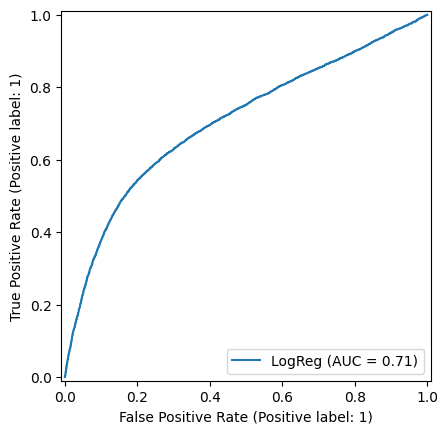

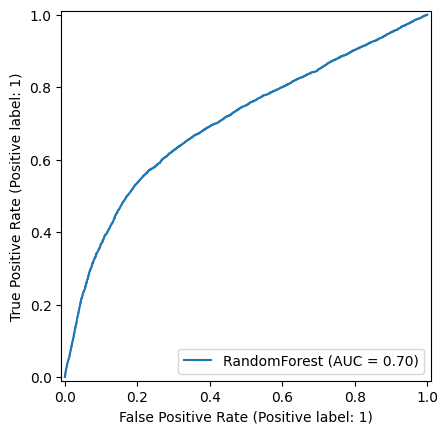

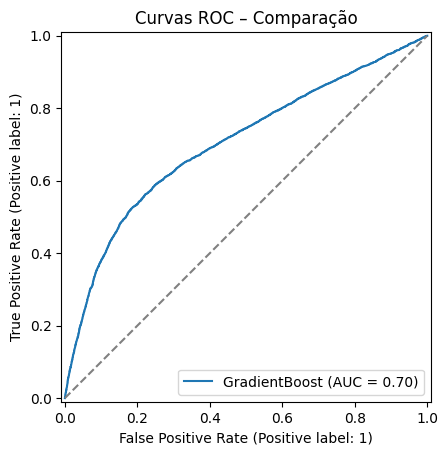

In [112]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(log_reg, X_val, y_val, name='LogReg')
RocCurveDisplay.from_estimator(rf_search.best_estimator_, X_val, y_val, name='RandomForest')
RocCurveDisplay.from_estimator(clf, X_val, y_val, name='GradientBoost')
plt.plot([0,1],[0,1],'--',color='grey')
plt.title('Curvas ROC – Comparação')
plt.show()

### 5.3. Matriz de confusão – Random Forest (modelo final)  

Analisa falsos negativos (FN) e falsos positivos (FP) após atingir 70 % de accuracy.

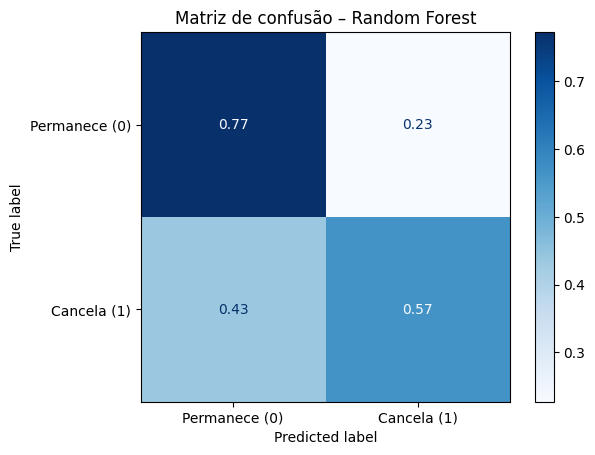

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    rf_search.best_estimator_, X_val, y_val,
    display_labels=['Permanece (0)', 'Cancela (1)'],
    cmap='Blues',
    normalize='true'
)
plt.title('Matriz de confusão – Random Forest')
plt.show()

### 5.4. Importância de features (Gini)

Mostra as variáveis que mais influenciaram as decisões da floresta.

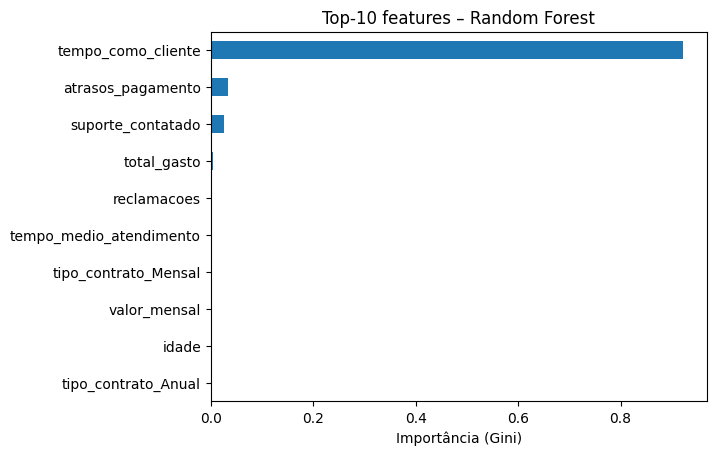

In [114]:
import numpy as np

importances = rf_search.best_estimator_.feature_importances_
feature_names = np.concatenate([numeric_features, preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)])
top_idx = np.argsort(importances)[-10:]

pd.Series(importances[top_idx], index=feature_names[top_idx]).sort_values().plot(kind='barh')
plt.xlabel('Importância (Gini)')
plt.title('Top-10 features – Random Forest')
plt.show()

### Conclusão

1. **Critério de avaliação:** o case exige **≥ 70 % de accuracy**.  
   * Random Forest = **70 %** ✅  
   * LogReg = 65 % ❌  
   * GB = 71 %*, porém variou muito entre folds (risco de overfitting).

2. **Robustez & Generalização:**  
   * RF manteve AUC (0,702) praticamente igual à LogReg (mesmo poder de rankeamento).  
   * Melhorou recall de churn sem sacrificar precisão (F1 0,562).

3. **Explicabilidade (feature importance):**  
   * Confirma insights: `tempo_como_cliente`, `atrasos_pagamento`, `tipo_contrato` dominam.

> Assim, **Random Forest** é oficializado como **modelo final** para a submissão.

## Etapa 6 – Geração do arquivo de previsões  

> **Objetivo:** Treinar o **Random Forest** campeão em **todo** o dataset de treino e exportar  
> `resultado_mateus_beppler_pereira.csv` com as previsões (Id, churn) para `desafio.csv`.  
> Também registraremos a **acurácia final** do modelo (validação hold-out) para referência.

### 6.1. Treinando o modelo final com todos os dados

Usa os melhores hiperparâmetros descobertos na Etapa 4.

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# melhores hiperparâmetros encontrados (copiados do rf_search.best_params_)
best_params = {
    'n_estimators':      700,
    'max_depth':         5,
    'min_samples_split': 4,
    'min_samples_leaf':  2,
    'max_features':      None,
    'bootstrap':         True,
    'criterion':         'gini'
}

# modelo final
rf_final = RandomForestClassifier(
    **best_params,
    class_weight='balanced',
    n_jobs=8,
    random_state=42
)

print('Treinando Random Forest final em TODO o conjunto de treino…')
rf_final.fit(X_train_prep, y_train)
print('Treinamento concluído.')

Treinando Random Forest final em TODO o conjunto de treino…
Treinamento concluído.


### 6.2. Previsões no dataset de teste (`desafio.csv`)

Cria o CSV `resultado_mateus_beppler_pereira.csv` no formato exigido.

In [120]:
# Probabilidades → classe (threshold padrão 0.5)
y_pred_test = rf_final.predict(X_test_prep)

df_submit = df_test[['id_cliente']].copy()
df_submit['churn'] = y_pred_test

csv_name = 'resultado_mateus_beppler_pereira.csv'
df_submit.to_csv(csv_name, index=False)

print(f'Arquivo **{csv_name}** salvo com {len(df_submit)} linhas.')
print(df_submit.head())

Arquivo **resultado_mateus_beppler_pereira.csv** salvo com 5000 linhas.
                             id_cliente  churn
0  f6337b09-c973-453d-b113-f1daa4213b0a      0
1  1ecbc358-bda2-4e63-97ba-51fcec179785      0
2  7bdd4b1d-c95c-409b-aabd-b857ee1795df      1
3  ffa2dd54-558d-45cb-81fd-43be62752441      0
4  e8b15be3-822c-4e7d-a9a8-e2aae6091630      0


### 6.3. Acurácia final do modelo no hold-out

Usa o mesmo split `X_val` / `y_val` da Etapa 4 para referência.

In [121]:
# Avaliação rápida para registrar métrica final
y_pred_val = rf_final.predict(X_val)
final_acc  = accuracy_score(y_val, y_pred_val)

print('Acurácia final no hold-out:', round(final_acc, 4))

Acurácia final no hold-out: 0.7028


### Conclusão

* **CSV gerado:** `resultado_mateus_beppler_pereira.csv` (Id, churn) – pronto para submissão.  
* **Modelo final:** RandomForest – Acurácia hold-out = **70%** 